# Module 4.2 - Plotting Applied

In module 4.1 we worked with matplotlib.pyplot and covered the basics, now we will apply matplotlib.pyplot to meteorology data. Let's plot some data!

## Multiple plots in one figure

- Until now we always created only one axes (`ax`), using the code `fig, ax = plt.subplots()`
- However, we can also create multiple axes in a single figure
- This is done by using dimensions as input to the function `plt.subplots(number_of_rows, number_of_columns)`
- For example, when we run the function `plt.subplots(2, 2)` we get 4 small axes in the same figure

In [ ]:
import matplotlib.pyplot as plt
plt.subplots(2, 2)

- To plot data in the different axes, we need to create a variable for each axes 
- Just like using `fig, ax = plt.subplots()` when creating a single axes, we can for example use `fig, (ax1, ax2) = plt.subplots(2, 1)` when creating multiple axes

Try to run the two cells below, each with a different number of rows and columns. Look at how the `fig` and different `ax` are begin written. 

In [ ]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2)

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1)

- Now we can work with the different axes (`ax1`, `ax2`, `ax3` etc.) in the same way as we worked with only `ax`

Let's load some data from meteoData and plot data in two axes.

In [ ]:
# First import pandas, load meteoData and create the Timestamp column (this takes some time!)
import pandas as pd
meteoData = pd.read_csv('Module3_3_meteoData.csv')
meteoData['Timestamp'] = pd.to_datetime(meteoData.Datetime, dayfirst=True)

In [ ]:
# Now let's select some data from meteoData
starttime = pd.to_datetime('2017-10-10')
endtime = starttime + pd.to_timedelta(3, unit='D')

md_selection = meteoData.loc[(meteoData.Timestamp >= starttime) & (meteoData.Timestamp < endtime)]

time = md_selection.Timestamp
rain = md_selection.Rain
solar = md_selection.SolarRad

# Now create one figure with two axes
fig, (ax1, ax2) = plt.subplots(2, 1)

# Plot the rain data on the first axes
ax1.plot(time, rain, label='Rain')

# And plot the radiation data on the second axes
ax2.plot(time, solar, label='Solar Radiation', c='y')

# Labels, legends, ticks, etc. all can be set seperately per axes
ax1.set_ylabel('Rain (mm)')
ax2.set_ylabel('Radiation (W/m^2)')

# Put the code of the below exercise (adding text to a plot) here
ax1.text(pd.to_datetime('2017-10-10'), 2, 'Some random text')
ax2.text(pd.to_datetime('2017-10-11'), 800, 'Inside the Radiation plot')
fig.text(0, 0, 'Bottom left corner')
fig.text(0.9, 0.9, 'Close to the top right corner')

### Adding text to a plot

It is also possible to add some text to a plot. This is done by the function `.text()`. You can add text either to the figure (`fig`) or to one of the axes (e.g., `ax1`). 
- When you add text to the axes, you can place it using coordinates. 
- When you add text to the figure, you can place it using values from 0 to 1 (`(0, 0)` being the bottom left corner and `(1, 1)` being the top right corner). 

**Exercise:** Now try to add the following lines of code to the cell above, one by one and see what happens.
    
1. `ax1.text(pd.to_datetime('2017-10-10'), 2, 'Some random text')`
2. `ax2.text(pd.to_datetime('2017-10-11'), 800, 'Inside the Radiation plot')`
3. `fig.text(0, 0, 'Bottom left corner')`
4. `fig.text(0.9, 0.9, 'Close to the top right corner')`

## Multiple plots in one figure - Exercise

In the cell below is some code that selects the meteorology data of a single day (March 1, 2017). Use this data to make some nice plots by completing the exercises. Watch the following:

- The `plt.subplots()` function is already given. You don't need to change this.
- You need to plot column vs column (e.g., `Timestamp` vs `Temp_Out`). Remember how to select a column: `dataframe_name.column_name`! (E.g., to select the column `Timestamp`, use `meteoData.Timestamp`.)

1. Plot Timestamp vs Temp_Out on ax1
2. Plot Timestamp vs Hum_Out on ax2
3. Plot Timestamp vs Windspeed_Hi on ax3
4. Plot Timestamp vs SolarRad on ax4
5. Give every axes a meaningful title (use the function `.set_title()`)

In [ ]:
# Create a starttime and endttime
starttime = pd.to_datetime('2017 mar 1')
endtime = starttime + pd.to_timedelta(1, unit='D')

# Select all the rows with a timestamp between the starttime and endtime
meteo_day = meteoData.loc[(meteoData.Timestamp >= starttime) & (meteoData.Timestamp < endtime)]
meteo_day

In [ ]:
# Create a 2 by 2 figure and the variables fig, ax1, ax2, ax3, and ax4
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 6))

# Plot Timestamp vs Temp_Out on ax1
ax1.plot(meteo_day.Timestamp, meteo_day.Temp_Out, c='r', lw=3)

# Plot Timestamp vs Hum_Out on ax2
ax2.plot(meteo_day.Timestamp, meteo_day.Hum_Out, c='g', lw=3)

# Plot Timestamp vs Windspeed_Hi on ax3
ax3.plot(meteo_day.Timestamp, meteo_day.Windspeed_Hi, lw=3)

# Plot Timestamp vs SolarRad on ax4
ax4.plot(meteo_day.Timestamp, meteo_day.SolarRad, c='y', lw=3)

# Give every axes a meaningful title
ax1.set_title('Temperature')
ax2.set_title('Humidity')
ax3.set_title('Windspeed')
ax4.set_title('Solar radiation')

# Making the xticklabels better visible
import numpy as np
xtick_values = np.arange(starttime, endtime+pd.to_timedelta(4, unit='H'), pd.to_timedelta(4, unit='H'))
xtick_labels = range(0, 25, 4)
ax1.set_xticks(xtick_values)
ax1.set_xticklabels(xtick_labels)
ax2.set_xticks(xtick_values)
ax2.set_xticklabels(xtick_labels)
ax3.set_xticks(xtick_values)
ax3.set_xticklabels(xtick_labels)
ax4.set_xticks(xtick_values)
ax4.set_xticklabels(xtick_labels)

# Increasing the space between subplots
plt.tight_layout(pad=2.5)

# Set x and y labels
ax1.set_xlabel('Time (hours)', fontsize=8)
ax2.set_xlabel('Time (hours)', fontsize=8)
ax3.set_xlabel('Time (hours)', fontsize=8)
ax4.set_xlabel('Time (hours)', fontsize=8)
ax1.set_ylabel('Temperature (C)', fontsize=9)
ax2.set_ylabel('Humidity (%)', fontsize=9)
ax3.set_ylabel('Windspeed (MPH)', fontsize=9)
ax4.set_ylabel('Solar radiation (W/m^2)', fontsize=9)

# Set a figure title
fig.suptitle('Meteorology data for March 1, 2017', y=1, weight='bold', fontfamily='sans-serif', fontsize=15)

## Scatter plot

Until now we have always used the function `ax.plot()`. This function creates a line plot. However, for some data it is better to make a scatterplot. This can be done using the function `ax.scatter()`. (There are many more types of plots to explore. For an overview, see https://matplotlib.org/stable/plot_types/index.html.)

Just as the normal `ax.plot()` function, `ax.scatter()` also can take two datasets as arguments. Let's show how the `.scatter()` function works by plotting `Temp_Out` vs `SolarRad` for the year 2018.

In [ ]:
# First select the data
starttime = pd.to_datetime('2018')
endtime = pd.to_datetime('2019')
md_selection = meteoData.loc[(meteoData.Timestamp >= starttime) & (meteoData.Timestamp < endtime)]

# Then create the fig and ax and plot the data
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(md_selection.Temp_Out, md_selection.SolarRad, s=2, c='g')

# Add some information to the plot
ax.set_title('Solar radiation vs Temperature')
ax.set_xlabel('Temperature (degrees Celsius)')
ax.set_ylabel('Solar radiation (W/m^2)')

This scatterplot clearly shows that there is a relation between temperature and solar radiation. 

Just as with lineplots, with scatterplots the visuals can be changed. For example, you can change the size and color of the datapoints. This is done by using the arguments `s=` and `c=` inside the `ax.scatter()` function. 

**Exercise:** Change the code above by adding the arguments `s=` and `c=` to the `ax.scatter()` function. Try out the following settings (or try some other settings yourself):
1. `s=5`
2. `s=0.5`
3. `c='r'`
4. `c='g'`

However, you can also use the size and colors to add a third dataset to the plot. Then the plot will show three dimensions. For example, to the solar radiation vs temperature plot, we can add the relative humidity. Then the color of the dots will indicate the value of humidity. 

Let's see this in action:

In [ ]:
# Show the relative humidity in the color of the dots
fig, ax = plt.subplots(figsize=(10, 6))

# Hum_Out is added to the color argument
ax.scatter(md_selection.Temp_Out, md_selection.SolarRad, s=4, c=md_selection.Hum_Out) # Here s= and c= are added as arguments

ax.set_title('Solar radiation vs Temperature vs Humidity')
ax.set_xlabel('Temperature (degrees Celsius)')
ax.set_ylabel('Solar radiation (W/m^2)')

When varying the colors of the dots, we might want to add a colorbar in our figure which can serve as legend. To create a colorbar we have to do two things:
- Assign the function `ax.scatter()` to a variable
- Use this variable as input to the function `fig.colorbar()`

Check the code below to see how this is done:

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

# We assing the ax.scatter() function to a variable
scatter = ax.scatter(md_selection.Temp_Out, md_selection.SolarRad, s=4, c=md_selection.Hum_Out, cmap='coolwarm') # Here s= and c= are added as arguments

# And we use this variable as input to the fig.colorbar() function
fig.colorbar(scatter, label='Humidity')

ax.set_title('Solar radiation vs Temperature vs Humidity')
ax.set_xlabel('Temperature (degrees Celsius)')
ax.set_ylabel('Solar radiation (W/m^2)')

Now we clearly see that the relative humidity decreases when temperature increases.

When color varies, we can also select _how_ it varies, with the argument `cmap=colormap_name`. For all available color variation maps, you can check the website https://matplotlib.org/stable/tutorials/colors/colormaps.html.

**Exercise**: add to the above code inside the scatter-function (ax.scatter) the argument `cmap='coolwarm'`, and see how the plot changes.


## Scatterplot - Exercise

Given is the dataset `meteo_2018`, meteorology data from 2018. Using this data, complete the following exercises:

1. Create a fig and ax
2. Plot the column `HeatIndex` vs the column `AirDensity` in a scatter plot
3. Change the size of the dots to 3
4. Add the column `Hum_Out` to the plot by setting the color of the dots, using the argument `c=`
5. Add a colorbar to the scatter plot: first assign the function `ax.scatter()` to a variable and then use this variable as input to the function `fig.colorbar()`
6. Make the plot look nice and informative by adding things and changing visuals. Be creative!

In [ ]:
# Select data from meteoData to create meteo_2018
starttime = pd.to_datetime('2018')
endtime = pd.to_datetime('2019')
meteo_2018 = meteoData.loc[(meteoData.Timestamp >= starttime) & (meteoData.Timestamp < endtime)]
meteo_2018

In [ ]:
# Exercises 1 - 6
fig, ax = plt.subplots(figsize=(12, 6))

my_plot = ax.scatter(meteo_2018.HeatIndex, meteo_2018.AirDensity, c=meteo_2018.Hum_Out, s=3)
fig.colorbar(my_plot, label='Humidity')

ax.set_title('Air Density vs Heat Index vs Humidity', pad=12, weight='bold', fontsize=15, c='b')
ax.set_xlabel('Heat Index', fontsize=12, c='b')
ax.set_ylabel('Air Density', fontsize=12, c='b')

## Plotting MeteoData - Additional Exercise

From this point on, it is best if you simply start practicing with your own data. However, if you want, you can give the next exercise a try.

Below, you can see a Figure with four Axes. In each of the axes, data from meteoData.csv is visualized. Try to create the same Figure, or parts of it, as close as possible.
Hints:
- A bar-graph can be created with `ax.bar()`;
- A title for the whole Figure (instead of a title for only one Axes), can be created with `fig.suptitle()`.
- Do not try to process and plot all at once. Systematically process data, and regularly check the outcome of what you do.

Apart from the use of `.bar` and `fig.suptitle`, the creation of the Figure and processing data has been done only with tools that have been part of the training.

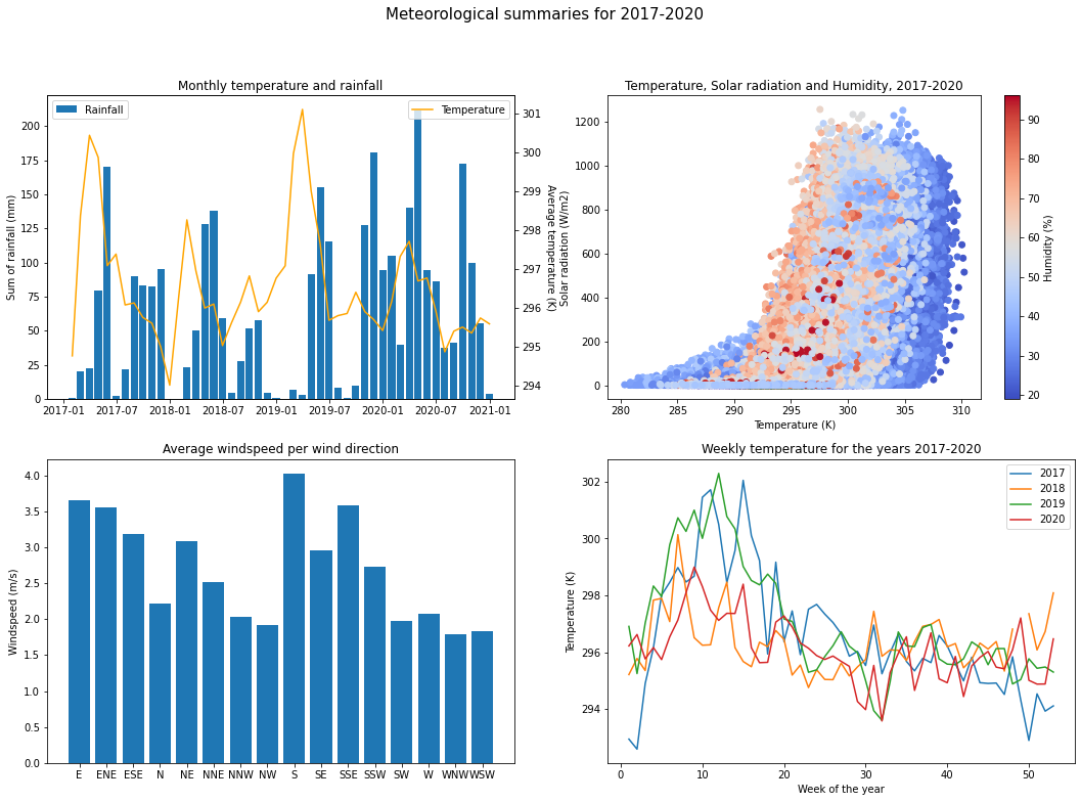

In [ ]:
# Selecting the data for years 2017-2020
meteoData2 = meteoData.loc[(meteoData.Timestamp >= pd.to_datetime('2017')) & (meteoData.Timestamp < pd.to_datetime('2021'))]

# Creating rain and temperature data for plot 1 using .resample()
rain = meteoData2.get(['Timestamp', 'Rain']).resample(rule='M', on='Timestamp').sum()
temp = meteoData2.get(['Timestamp', 'Temp_Out']).resample(rule='M', on='Timestamp').mean() + 273.15

# Creating the wind data for plot 3 using .groupby()
wind = meteoData2.get(['Winddir', 'Windspeed_Hi']).groupby(by='Winddir').mean()
windAvg = wind.Windspeed_Hi

# Creating temperature data for plot 4
# Here the function .pivot() is used. You can also make four different selection, one for every year.
temp2 = meteoData2.get(['Timestamp', 'Temp_Out']).resample(rule='D', on='Timestamp').mean()
temp2.loc[:, 'year'] = temp2.index.year
temp2.loc[:, 'dayofyear'] = temp2.index.dayofyear
yearly_temp = temp2.pivot(index='dayofyear', columns='year', values='Temp_Out') + 273.15
yearly_temp = yearly_temp.groupby(by=yearly_temp.index // 7 + 1).mean()

In [ ]:
# Creating figure and axes
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 12))


########## Plot 1 ##########
ax1.bar(rain.index, rain.Rain, label='Rainfall', width=pd.to_timedelta(25, 'D'))
ax1b = ax1.twinx()
ax1b.plot(temp.Temp_Out, label='Temperature', c='orange')

ax1.set_ylabel('Sum of rainfall (mm)')
ax1b.set_ylabel('Average temperature (K)', rotation=270, va='bottom')
ax1.set_title('Monthly temperature and rainfall')
ax1.legend(loc='upper left')
ax1b.legend(loc='upper right')


########## Plot 2 ##########
scatter = ax2.scatter(meteoData2.Temp_Out+273.15, meteoData2.SolarRad, c=meteoData2.Hum_in, cmap='coolwarm')
cbar = fig.colorbar(scatter, ax=ax2)

cbar.set_label('Humidity (%)')
ax2.set_ylabel('Solar radiation (W/m2)')
ax2.set_xlabel('Temperature (K)')
ax2.set_title('Temperature, Solar radiation and Humidity, 2017-2020')


########## Plot 3 ##########
ax3.bar(np.arange(len(windAvg)), windAvg)

ax3.set_xticks(np.arange(len(windAvg)))
ax3.set_xticklabels(windAvg.index)

ax3.set_ylabel('Windspeed (m/s)')
ax3.set_title('Average windspeed per wind direction')


########## Plot 4 ##########
ax4.plot(yearly_temp[2017], label='2017')
ax4.plot(yearly_temp[2018], label='2018')
ax4.plot(yearly_temp[2019], label='2019')
ax4.plot(yearly_temp[2020], label='2020')

ax4.set_xlabel('Week of the year')
ax4.set_ylabel('Temperature (K)')
ax4.set_title('Weekly temperature for the years 2017-2020')
ax4.legend()


# Creating a title for the whole figure
fig.suptitle('Meteorological summaries for 2017-2020', size=15)